# Niż demograficzny a spadek liczby miejsc w domach studenckich

In [91]:
library("tidyverse")
library("jpeg")
library("scales")
library("zoo")

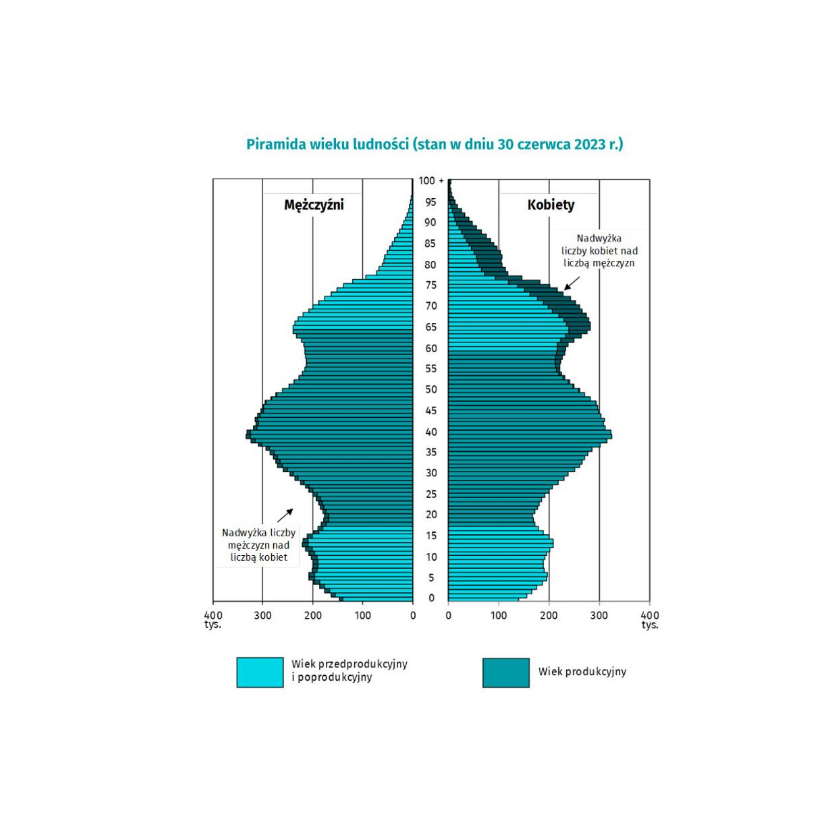

In [103]:
jj <- readJPEG("Wykres_demografia.jpg", native = TRUE)
plot(0:1, 0:1, type="n", ann = FALSE, axes = FALSE)
rasterImage(jj, 0, 0, 1, 1)

In [176]:
graduates <- read.csv2("dane3_kopia_zapasowa/Absolwenci uczelni.csv")
student_houses <- read.csv2("dane3_kopia_zapasowa/Domy studenckie.csv")
students_in_houses <- read.csv2("dane3_kopia_zapasowa/Korzystający z domów studenckich.csv")
spots_in_student_houses <- read.csv2("dane3_kopia_zapasowa/Miejsca w domach studenckich.csv")
students <- read.csv2("dane3_kopia_zapasowa/Studenci uczelni.csv")
profits <- read.csv2("dane3_kopia_zapasowa/przychody.csv")

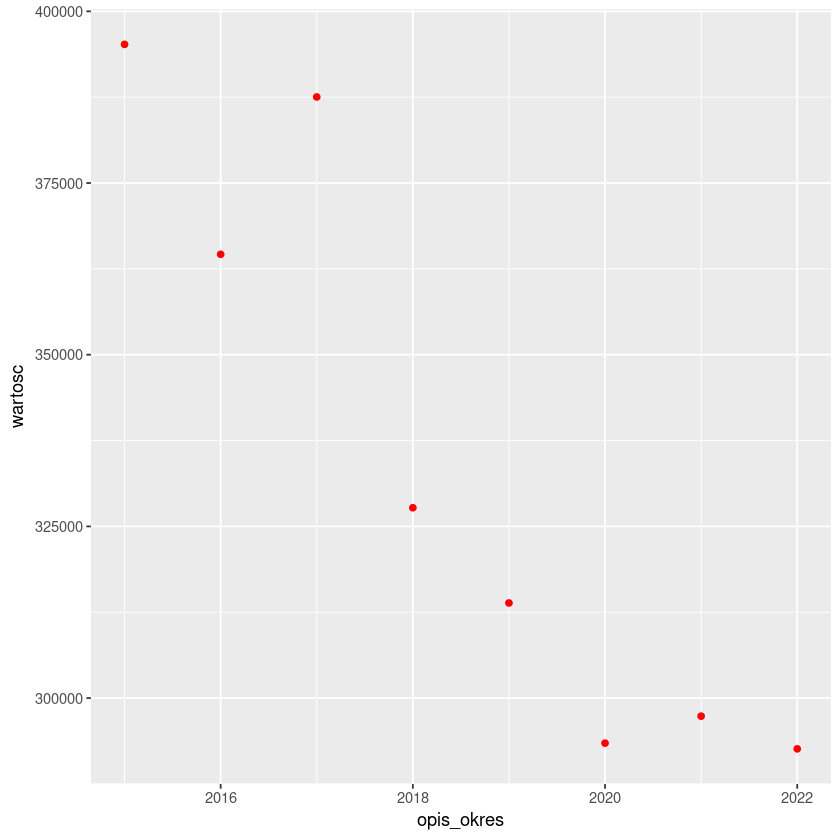

In [177]:
graduates |>
  filter(opis_okres > 2014 & nazwa_pozycja_2 == "Ogółem") |>
  select(opis_okres, wartosc) |>
  group_by(opis_okres) |>
  ggplot(aes(x = opis_okres, y = wartosc)) + geom_point(color = "red")

In [175]:
merged_house

opis_okres,wartosc.x,typ_informacji.x,wartosc.y,typ_informacji.y
<dbl>,<dbl>,<chr>,<dbl>,<chr>
2010,137.8,[tys. szt.],119.00,[tys. osób]
2011,137.9,[tys. szt.],118.20,[tys. osób]
2012,137.4,[tys. szt.],115.90,[tys. osób]
2013,136.9,[tys. szt.],113.30,[tys. osób]
2014,135.5,[tys. szt.],109.25,[tys. osób]
2015,132.0,[tys. szt.],105.20,[tys. osób]
2016,129.9,[tys. szt.],101.70,[tys. osób]
2017,126.0,[tys. szt.],95.70,[tys. osób]
2018,124.4,[tys. szt.],90.60,[tys. osób]


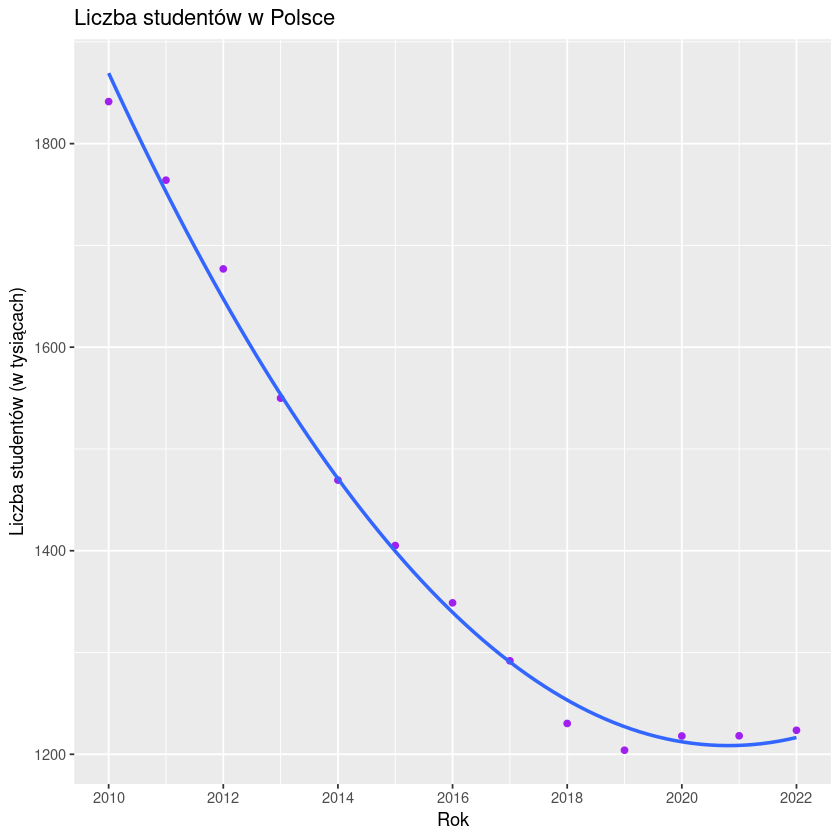

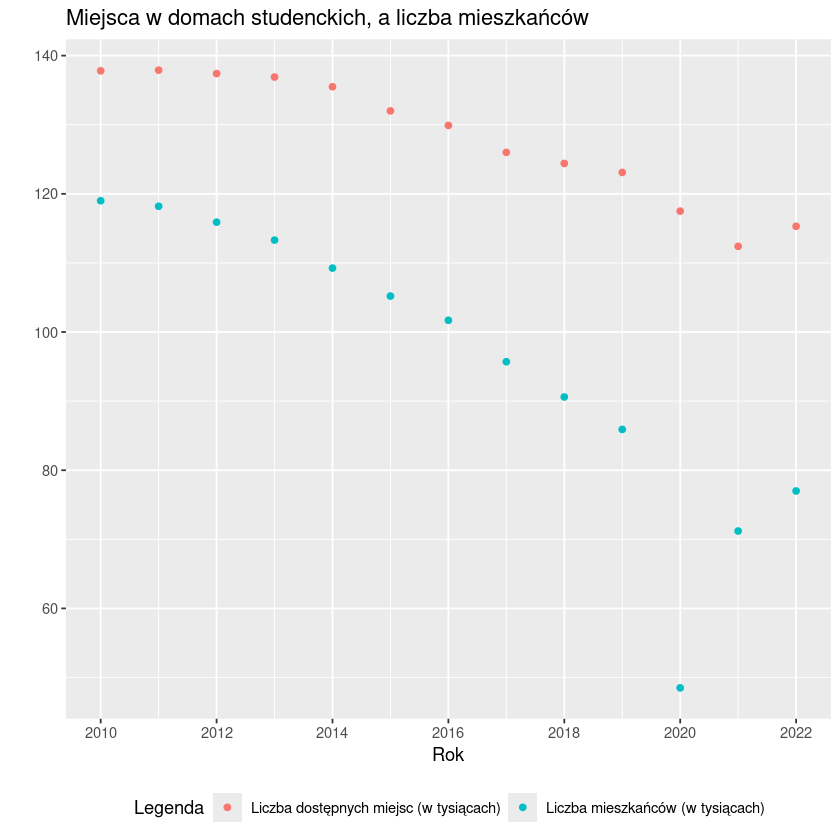

In [201]:
students <- students |> select(opis_okres, wartosc, typ_informacji)
spots_in_student_houses <- spots_in_student_houses |> select(opis_okres, wartosc, typ_informacji)
students_in_houses <- students_in_houses |> select(opis_okres, wartosc, typ_informacji)
students_in_houses$wartosc <- students_in_houses$wartosc |> na.approx()
students_in_houses$typ_informacji <- "Liczba mieszkańców (w tysiącach)"
spots_in_student_houses$typ_informacji <- "Liczba dostępnych miejsc (w tysiącach)"
merged_houses <- rbind(spots_in_student_houses, students_in_houses)
students |>
  ggplot(aes(x = opis_okres, y = wartosc)) +
  geom_point(color = "purple") +
  scale_x_continuous(breaks = pretty_breaks()) +
  geom_smooth(aes( y = wartosc), method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Liczba studentów w Polsce", x = "Rok", y = "Liczba studentów (w tysiącach)")
merged_houses|>
  group_by(opis_okres) |>
  ggplot(aes(x = opis_okres, y = wartosc, color = typ_informacji)) +
  geom_point() +
  scale_x_continuous(breaks = pretty_breaks()) +
  labs(title = "Miejsca w domach studenckich, a liczba mieszkańców", x = "Rok", y ="") +
  guides(color = guide_legend(title = "Legenda")) +
  theme(legend.position = "bottom")

In [107]:
profits <- profits |> select(opis_okres, wartosc, typ_informacji)

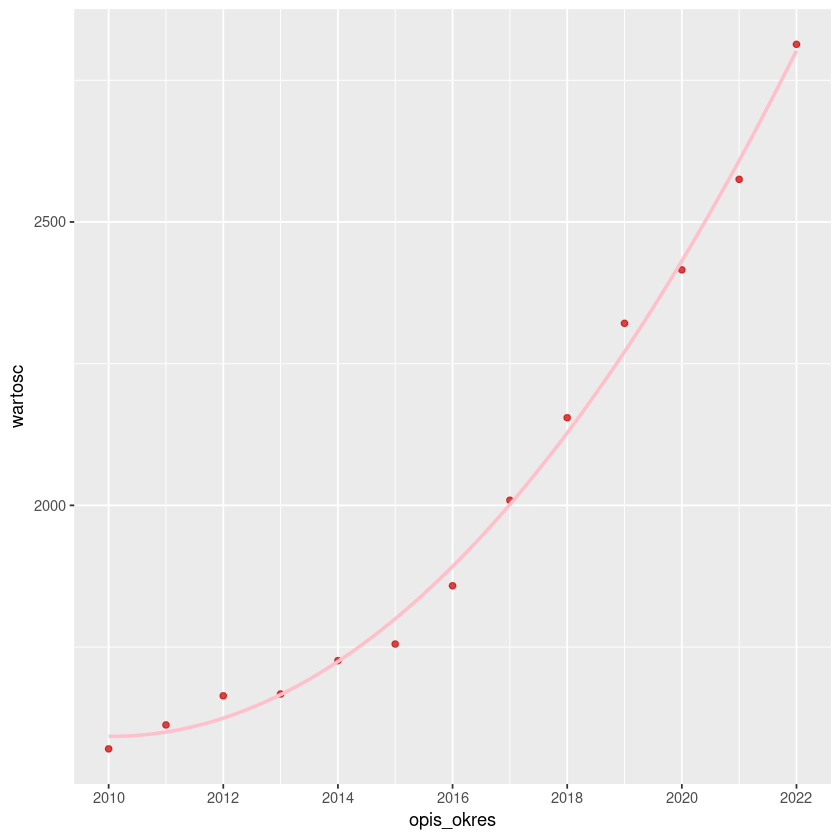

In [138]:
profits |>
  ggplot(aes(x = opis_okres, y = wartosc)) +
  geom_point(color = "#cf1414c9") +
  scale_x_continuous(breaks = pretty_breaks()) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "pink")